# PyTorch and PyTorch Lightning
## Deep Learning and Generative AI
### [Dr. Elias Jacob de Menezes Neto](https://docente.ufrn.br/elias.jacob)

## Summary

### Keypoints

- PyTorch is an open-source machine learning library that provides tensor computation and dynamic neural networks, offering flexibility and control.

- Key features of PyTorch include GPU-accelerated tensor computation and automatic differentiation (autograd), which streamline the development of neural networks.

- The typical neural network training procedure in PyTorch involves defining the network, iterating over data, computing loss, backpropagation, and updating weights, which are essential for model learning.

- PyTorch Lightning is a lightweight wrapper that simplifies PyTorch code by abstracting away boilerplate, making it easier to build and train models.

- DataLoaders in PyTorch help efficiently manage and retrieve data through batching, shuffling, and parallel loading, which are crucial for effective model training.

- Data transforms are essential for preprocessing and increasing datasets before model training, ensuring data is in the right format and enhancing model robustness.

- The training loop is fundamental in machine learning, involving steps like initializing the model/optimizer, defining loss, loading data, and iterating to update parameters, crucial for model performance and optimization.


### Takeaways

- PyTorch provides flexibility and control but requires more boilerplate code compared to higher-level frameworks, which can be overwhelming for beginners.

- PyTorch Lightning reduces boilerplate while maintaining PyTorch's flexibility, making it easier to build and train models.

- Proper data handling with DataLoaders and transforms is crucial for efficient and effective model training, ensuring data is properly managed and preprocessed.

- Understanding the components of the training loop helps in troubleshooting and optimizing the learning process, which is essential for improving model performance.

- Softmax scores from models should not be interpreted as true probabilities, as models can be poorly calibrated, leading to overconfident predictions.

- Mixed precision training can improve training speed and reduce memory usage but requires monitoring for potential numerical instability, ensuring model accuracy.

- Modular design using Lightning's LightningModule and DataModule promotes code organization and reusability, easing easier experimentation and collaboration.


## [PyTorch](https://pytorch.org) Basics

### What is PyTorch?

PyTorch is an open-source machine learning library developed by Facebook's AI Research lab (FAIR). It is built on the Torch library and is mainly used for applications such as natural language processing. PyTorch is free and open-source software, released under the Modified BSD license.

#### Key Features

PyTorch provides two primary high-level features:
- **Tensor computation**: Similar to NumPy but with strong GPU acceleration.
- **Dynamic neural networks**: Built on a tape-based automatic differentiation system (autograd).

### Transition from Keras

While Keras was excellent for our first lesson, PyTorch offers several advantages for more advanced deep learning tasks:

- **Dynamic Computation Graph**: PyTorch's dynamic computation graph allows for more flexibility in model design, enabling you to change the architecture during runtime.
- **Extensive Customization**: PyTorch provides extensive support for custom layers, loss functions, and optimizers, making it highly customizable for specific research needs.
- **Strong Community and Ecosystem**: PyTorch has a strong community and a growing ecosystem of libraries and tools, which can be beneficial for both research and production.

### Tensors

Tensors are the fundamental data structure in PyTorch. Tensors in PyTorch support a wide range of mathematical operations, similar to NumPy arrays. These operations can be performed efficiently on both CPU and GPU, allowing for fast computations on large datasets. Some common tensor operations include element-wise operations, matrix multiplications, and reductions.

### Autograd

Central to all neural networks in PyTorch is the `autograd` package. This package provides automatic differentiation for all operations on Tensors. Key points to remember about `autograd`:
- It is a **define-by-run framework**, meaning that backpropagation is defined by how your code runs, allowing for dynamic graph creation on-the-fly.
- Every iteration can have different computational graphs, providing great flexibility.

### Neural Networks

Neural networks in PyTorch are constructed using the `torch.nn` package. The central class here is `nn.Module`, which includes layers and a method `forward(input)` that computes the output.

#### Typical Training Procedure

Here is a step-by-step breakdown of training a neural network in PyTorch:

1. **Define the neural network**: Set up the architecture with learnable parameters (weights).
2. **Repeat over a dataset**: Loop through the input data.
3. **Forward pass**: Process each input through the network.
4. **Compute the loss**: Measure how far the output is from the target value.
5. **Backpropagation**: Use the autograd package to propagate gradients back through the network.
6. **Update weights**: Adjust the network's weights using an update rule like gradient descent:
```
weight = weight - learning_rate * gradient
```
7. **Repeat**: Repeat over the dataset multiple times to improve the model.

### From Theory to Practice: Implementing a Neural Network
Now that we've covered the basics of PyTorch, let's put this knowledge into practice by reimplementing our fully connected classifier. This hands-on example will demonstrate how to translate the concepts we've learned into actual code.

# Reimplementing the Fully Connected Classifier using PyTorch

Before moving on to more complex models, let's reimplement the Fully Connected classifier from our last notebook using PyTorch. This will help us understand the basics of PyTorch and how to build and train a neural network using it.

In [1]:
# Import the main PyTorch library
import torch

# Import the neural network module from PyTorch
from torch import nn

# Import the functional interface of the neural network module
from torch.nn import functional as F

# Import the DataLoader class for creating data loaders
from torch.utils.data import DataLoader

# Import the datasets module from torchvision for accessing standard datasets
from torchvision import datasets

# Import the transforms module from torchvision for data preprocessing
from torchvision.transforms import v2

### Creating Models in [PyTorch](https://pytorch.org/)

To define a neural network in PyTorch, we create a class that inherits from `nn.Module`. This allows us to exploit the powerful features provided by the `torch.nn` module, such as predefined layers and automatic differentiation.

#### Steps to Create a Neural Network Model

1. **Inherit from `nn.Module`**: This is the base class for all neural network modules in PyTorch.
2. **Define Layers in `__init__` Function**:
    - The `__init__` function is where you will specify the components (or layers) of your neural network.
    - These layers could be convolutional layers, linear layers, activation functions, etc.
3. **Specify Forward Pass in `forward` Function**:
    - The `forward` function defines how data flows through the network.
    - It takes an input tensor and returns the output tensor after passing through various layers of the network.

#### Example Structure

Here's an illustrative breakdown of a basic neural network structure:

1. **Initialization (`__init__` Function)**:
    - Import necessary layers and components from `torch.nn`.
    - Initialize the layers like linear layers, convolutional layers, or activation functions.

2. **Forward Pass (`forward` Function)**:
    - Define the sequence in which the data passes through these layers.
    - Apply each layer to the input in the correct order and return the final output.

#### Using GPU or MPS for Acceleration

- Once the model architecture is defined, moving it to available hardware accelerators can significantly improve performance.
- You can transfer the entire model to a GPU (Graphics Processing Unit) or MPS (Metal Performance Shaders for Apple devices) if available.
- This is especially useful for large-scale computations and deep learning tasks that require intensive processing power.

In [2]:
# Determine the device to run the computations on
# Check if a CUDA-enabled GPU is available
device = (
    "cuda"
    if torch.cuda.is_available()
    # If CUDA is not available, check for an Apple Silicon GPU (MPS)
    else (
        "mps"
        if torch.backends.mps.is_available()
        # If neither CUDA nor MPS is available, fall back to the CPU
        else "cpu"
    )
)

# Print out the device being used for computations
print(f"Using {device} device")

Using cuda device


In [3]:
class ImageClassifier(nn.Module):
    """A neural network model for image classification."""

    def __init__(self) -> None:
        """
        Initializes the ImageClassifier model.

        This model consists of a flattening layer followed by a stack of fully connected layers
        with ReLU activations.
        """
        super(ImageClassifier, self).__init__()
        # Layer to flatten the input image tensor (e.g., 256x256) into a 1D tensor
        self.flatten = nn.Flatten()
        # Define a sequence of fully connected layers with ReLU activations
        self.fully_connected_layers = nn.Sequential(
            nn.Linear(
                256 * 256, 1024
            ),  # First fully connected layer: input size 256*256, output size 1024
            nn.ReLU(),  # ReLU activation function
            nn.Linear(
                1024, 1024
            ),  # Second fully connected layer: input size 1024, output size 1024
            nn.ReLU(),  # ReLU activation function
            nn.Linear(
                1024, 1024
            ),  # Third fully connected layer: input size 1024, output size 1024
            nn.ReLU(),  # ReLU activation function
            nn.Linear(
                1024, 1024
            ),  # Fourth fully connected layer: input size 1024, output size 1024
            nn.ReLU(),  # ReLU activation function
            nn.Linear(
                1024, 2
            ),  # Output layer: input size 1024, output size 2 (for binary classification)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        Defines the forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor representing a batch of images.

        Returns:
            Tensor: Output logits from the model.
        """
        x = self.flatten(
            x
        )  # Flatten the input tensor from (batch_size, 256, 256) to (batch_size, 256*256)
        logits = self.fully_connected_layers(
            x
        )  # Pass the flattened tensor through the fully connected layers
        return logits  # Return the output logits (unnormalized scores for each class)

#### Understanding the Model Architecture
Let's break down the structure of our `ImageClassifier` model:
1. The `flatten` layer converts our 2D image input into a 1D vector.
2. We then have a series of fully connected (linear) layers with ReLU activations.
3. The final layer outputs logits for our two classes (dogs and cats).

In [4]:
# Instantiate the ImageClassifier model and move it to the specified device (CPU, CUDA, or MPS)
model = ImageClassifier().to(device)

# Print the model architecture to visualize the layers and their configurations
print(model)

ImageClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fully_connected_layers): Sequential(
    (0): Linear(in_features=65536, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=2, bias=True)
  )
)


### Datasets & DataLoaders in PyTorch

Managing data efficiently is crucial for any machine learning project. PyTorch provides robust tools to handle datasets and streamline the workflow of feeding data into your neural network models.

#### Importance of Decoupling Data Processing from Model Training

- **Readability**: Separating dataset handling from model training code makes the codebase easier to read and understand.
- **Modularity**: This separation enhances code reusability and maintainability, allowing you to make changes to either component without affecting the other.

#### Fundamental Data Primitives

PyTorch offers two fundamental classes for managing data:

1. **`torch.utils.data.Dataset`**:
    - This class stores the samples and their corresponding labels.
    - It can be used to load any custom dataset by overriding methods like `__len__` (returns the size of the dataset) and `__getitem__` (fetches a data sample).

2. **`torch.utils.data.DataLoader`**:
    - It wraps an iterable around the `Dataset` to enable convenient access to the data samples.
    - Useful features include batching, shuffling, and parallel data loading with multiple workers.


Now, let's move on to how we can actually load and work with a dataset in PyTorch.

In [5]:
import torchvision
import os
import pandas as pd
from glob import glob
from PIL import Image
import torch
from typing import Optional, Tuple


class DogsCatsDataset(torch.utils.data.Dataset):
    def __init__(
        self, root_dir: str, transform: Optional[torchvision.transforms.Compose] = None
    ):
        """
        Initialize the DogsCatsDataset.

        Args:
            root_dir (str): Directory with all the images.
            transform (Optional[torchvision.transforms.Compose]): Transformations to be applied to the images.
        """
        self.root_dir = root_dir
        self.transform = transform
        # Collect all image file paths in the root directory and its subdirectories
        self.image_paths = glob(os.path.join(root_dir, "*/*.jpg"))

    def __len__(self) -> int:
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Number of samples.
        """
        # Return the number of image files found
        return len(self.image_paths)

    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        """
        Get a sample from the dataset.

        Args:
            index (int): Index of the sample to retrieve.

        Returns:
            Tuple[torch.Tensor, int]: Tuple containing the image tensor and its label.
        """
        # Get the file path of the image at the specified index
        image_path = self.image_paths[index]
        # Open the image and convert it to grayscale
        image = Image.open(image_path).convert("L")
        # Determine the label based on the file path (1 for CAT, 0 for DOG)
        label = 1 if "CAT" in image_path else 0

        # Apply transformations if any are provided
        if self.transform:
            image = self.transform(image)

        # Return the transformed image and its label
        return image, label

#### Why Do You Need a DataLoader?

When working with machine learning models, efficiently managing and retrieving data is crucial. While the `Dataset` class in PyTorch enables you to access individual samples, it's often not enough for training complex models. This is where the `DataLoader` class comes into play. The `DataLoader` class optimizes the data feeding pipeline through batching, shuffling, and parallel data loading. These features collectively enhance memory efficiency, reduce overfitting, and expedite the training process, making it an indispensable tool for effective model training in PyTorch.


1. **Batching**:
    - **Definition**: Batching refers to the process of dividing the dataset into smaller, manageable groups of data points called mini-batches.
    - **Advantages**:
        - **Memory Efficiency**: Working with mini-batches reduces the memory footprint compared to loading the entire dataset at once.
        - **Training Efficiency**: Enables gradient updates and model training to occur more frequently, improving convergence rates.

2. **Shuffling**:
    - **Definition**: Shuffling involves randomly rearranging the order of the data samples at the start of each epoch.
    - **Advantages**:
        - **Prevent Overfitting**: Helps the model generalize better by ensuring it doesn't learn the order of the data.
        - **Fair Training**: Ensures each mini-batch contains diverse samples from the dataset, preventing bias during training.

3. **Parallel Data Loading**:
    - **Definition**: Parallel data loading uses multiple CPU cores to load data together.
    - **Advantages**:
        - **Speed**: Significantly speeds up data retrieval times, which can otherwise be a bottleneck during training.
        - **Efficiency**: Uses available computational resources effectively, allowing the GPU to spend more time on computations rather than waiting for data.

### Transforms

When training machine learning algorithms, especially in tasks like image processing or natural language processing, data rarely comes in its final, ready-to-use form. Data transformations are essential for preprocessing and increasing the dataset to make it suitable for training. This ensures that our machine learning model receives standardized, processed, and potentially augmented data, which can significantly affect performance and generalization capability.

#### Why Use Transforms?

1. **Data Normalization**:
    - **Purpose**: To standardize the input data so that it has a consistent format and range.
    - **Example**: Converting pixel values of images from the range [0, 255] to [0, 1].

2. **Data Augmentation**:
    - **Purpose**: To increase the diversity of the training set by applying random transformations.
    - **Example**: Randomly flipping, rotating, or cropping images to create new variations, helping the model become more robust.

3. **Preprocessing**:
    - **Purpose**: To convert raw data into a format that is directly usable by the machine learning model.
    - **Example**: Resizing images to a fixed size or converting texts to numerical vectors.

#### Implementing Transforms in TorchVision

All TorchVision datasets support two parameters - `transform` and `target_transform`:

- **transform**
    - **Role**: Used to modify the features (inputs) of the dataset.
    - **Usage**: Applying a series of transformations (e.g., resizing, normalization) to each sample before feeding it to the model.

- **target_transform**
    - **Role**: Used to modify the labels (targets) of the dataset.
    - **Usage**: Applying transformations that alter the target labels (e.g., converting class indices to one-hot encodings).

#### TorchVision.transforms Module

The `torchvision.transforms` module provides several commonly-used transformations, enabling you to easily apply standard manipulations to your dataset:

- **Common Transforms**:
    - `Resize`: Resizes the image to a specified size.
    - `ToTensor`: Converts a PIL Image or numpy.ndarray to a tensor.
    - `Normalize`: Normalizes a tensor image with mean and standard deviation.
    - `RandomHorizontalFlip`: Randomly flips the image horizontally with a given probability.
    - `RandomCrop`: Crops the image to a random location.

In [6]:
import torchvision.transforms.v2

# Define a set of transformations to be applied to the images
image_transforms = torchvision.transforms.v2.Compose(
    [
        torchvision.transforms.v2.ToImage(),  # Ensure the input is converted to an image format
        torchvision.transforms.v2.ToDtype(
            torch.float32, scale=True
        ),  # Convert the image to float32 and scale pixel values to [0, 1]
        torchvision.transforms.v2.Resize(
            (256, 256), antialias=True
        ),  # Resize the image to 256x256 pixels with antialiasing to reduce artifacts
    ]
)

In [7]:
# Create the training dataset
ds_train = DogsCatsDataset(
    root_dir="data/dogs-vs-cats/train",  # Path to the training data directory
    transform=image_transforms,  # Apply the defined image transformations
)

# Create the validation dataset
ds_valid = DogsCatsDataset(
    root_dir="data/dogs-vs-cats/valid",  # Path to the validation data directory
    transform=image_transforms,  # Apply the defined image transformations
)

# Create the test dataset
ds_test = DogsCatsDataset(
    root_dir="data/dogs-vs-cats/test",  # Path to the test data directory
    transform=image_transforms,  # Apply the defined image transformations
)

In [8]:
# Access the first sample from the training dataset
# This will return a tuple containing the transformed image tensor and its corresponding label
# Note that the image is normalized and resized to 256x256 pixels as per the defined transformations
image, label = ds_train[0]

# Display the image tensor and label
# The image tensor will be in the shape (1, 256, 256) due to the grayscale conversion and resizing
# The label will be 1 for CAT and 0 for DOG
print(image, label)

Image([[[0.0078, 0.0078, 0.0078,  ..., 0.0078, 0.0078, 0.0078],
        [0.0078, 0.0078, 0.0078,  ..., 0.0081, 0.0079, 0.0078],
        [0.0078, 0.0078, 0.0078,  ..., 0.0107, 0.0082, 0.0078],
        ...,
        [0.3962, 0.4433, 0.4933,  ..., 0.3729, 0.3761, 0.3794],
        [0.3813, 0.4208, 0.4802,  ..., 0.3835, 0.3887, 0.3841],
        [0.3752, 0.4049, 0.4676,  ..., 0.4063, 0.4062, 0.3970]]], ) 0


In [9]:
len(ds_train), len(ds_valid), len(ds_test)

(19947, 2492, 2492)

In [10]:
import matplotlib.pyplot as plt
import torch


def display_image_with_label(image_tensor: torch.Tensor, label: int) -> None:
    """
    Display an image with its corresponding label.

    Args:
        image_tensor (torch.Tensor): The image tensor to display.
        label (int): The label associated with the image.
    """

    # Permute the dimensions of the image tensor from (C, H, W) to (H, W, C)
    # This is necessary because matplotlib expects the color channel to be the last dimension
    plt.imshow(image_tensor.permute(1, 2, 0), cmap="gray")

    # Set the title of the plot to display the label
    plt.title(f"Label: {label}")

    # Display the image
    plt.show()

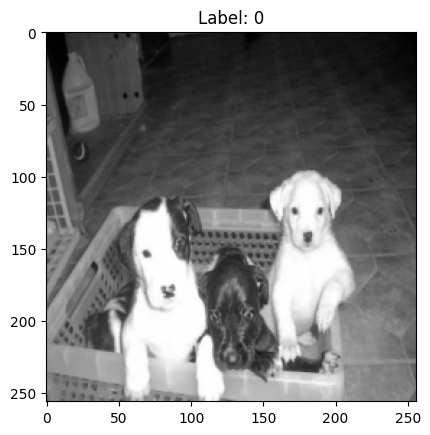

In [11]:
# Check one sample from the training dataset
# Retrieve the first image and its corresponding label from the dataset
image, label = ds_train[0]

# Display the image along with its label using the defined function
# The function will show the image and annotate it with the label (1 for CAT, 0 for DOG)
display_image_with_label(image, label)

In [12]:
# Creating the DataLoader for the training dataset
# DataLoader helps in batching the data, shuffling it, and loading it in parallel using multiprocessing workers
train_dl = DataLoader(
    ds_train,  # The training dataset
    batch_size=128,  # Number of samples per batch to load
    shuffle=True,  # Shuffle the data at every epoch to ensure the model generalizes better
)

# Creating the DataLoader for the validation dataset
# Validation data is not shuffled because we want to evaluate the model on the same data every epoch
valid_dl = DataLoader(
    ds_valid,  # The validation dataset
    batch_size=128,  # Number of samples per batch to load
    shuffle=False,  # Do not shuffle the validation data
)

# Creating the DataLoader for the test dataset
# Test data is also not shuffled for consistent evaluation
test_dl = DataLoader(
    ds_test,  # The test dataset
    batch_size=128,  # Number of samples per batch to load
    shuffle=False,  # Do not shuffle the test data
)

#### Batching and Shuffling: Why They Matter
- **Batching** allows us to process multiple samples at once, leveraging the parallel processing capabilities of modern hardware.
- **Shuffling** helps prevent the model from learning the order of the training data, which could lead to overfitting.

In [13]:
# Checking one batch of data from the training DataLoader

# Get the next batch of features and labels from the training DataLoader
# `iter(train_dl)` creates an iterator over the DataLoader
# `next()` retrieves the next batch from the iterator
batch_features, batch_labels = next(iter(train_dl))

# Print the shape of the feature batch
# This shows the dimensions of the batch of images
# The shape will be (batch_size, channels, height, width), e.g., (128, 1, 256, 256)
print(f"Feature batch shape: {batch_features.size()}")

# Print the shape of the labels batch
# This shows the dimensions of the batch of labels
# The shape will be (batch_size,), e.g., (128,)
print(f"Labels batch shape: {batch_labels.size()}")

Feature batch shape: torch.Size([128, 1, 256, 256])
Labels batch shape: torch.Size([128])


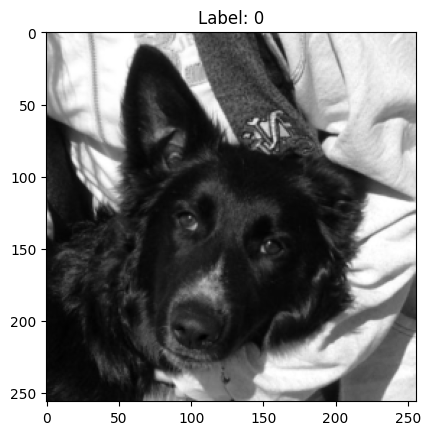

In [14]:
# Extract the first image and its corresponding label from the batch
# `batch_features[0]` retrieves the first image tensor from the batch
# `batch_labels[0]` retrieves the first label from the batch
image, label = batch_features[0], batch_labels[0]

# Display the extracted image along with its label
# The `display_image_with_label` function will show the image and annotate it with the label (1 for CAT, 0 for DOG)
display_image_with_label(image, label)

## The Training Loop

The training loop is the fundamental mechanism in any machine learning project, responsible for iteratively improving the model by learning from data. This process involves several key steps that ensure the model's parameters are adjusted effectively to enhance its performance over time.

### Key Steps in a Training Loop:

1. **Initialize the Model**:
    - **Objective**: Define the neural network architecture and set up its initial parameters.
    - **Importance**: Sets the stage for how the model will process inputs and generate outputs.

2. **Initialize the Optimizer**:
    - **Objective**: Select an optimization algorithm (e.g., SGD, Adam) that will be used to update the model’s weights.
    - **Importance**: Determines how efficiently and effectively the model learns from the data.

3. **Define the Loss Function**:
    - **Objective**: Choose an appropriate loss function to quantify the difference between the model's predictions and the actual labels.
    - **Importance**: Guides the optimizer on how to adjust the model's weights to minimize prediction errors.

4. **Load the Data**:
    - **Objective**: Load the training dataset using a DataLoader, which handles batching and shuffling.
    - **Importance**: Ensures that the model receives data in manageable portions and in random order to improve learning efficiency.

5. **Iterate Over the Dataset**:
    - **Objective**: For each batch of data, perform a series of steps to update the model’s parameters.
    - **Steps**:
        - **Forward Pass**: Input data is passed through the model to generate predictions.
        - **Compute the Loss**: Calculate the discrepancy between the predictions and ground truth labels using the loss function.
        - **Backward Pass**: Compute the gradients of the loss with respect to the model's parameters (backpropagation).
        - **Update the Weights**: Use the optimizer to adjust the model's weights based on computed gradients.

6. **Evaluate the Model**:
    - **Objective**: Periodically assess the model’s performance on a validation set.
    - **Importance**: Provides insights into the model's generalization ability and helps in early stopping or hyperparameter tuning.

7. **Repeat**:
    - **Objective**: Continuously execute the above steps for a predefined number of epochs or until a defined stopping criterion is met.
    - **Importance**: Allows the model to steadily improve its accuracy and reliability through repeated adjustments.

### The Batch Processing and Epoch Concept:

- **Batch**:
    - A subset of the entire dataset.
    - Each batch is passed through the model for forward and backward passes.

- **Epoch**:
    - One complete pass through the entire dataset.
    - Consists of multiple batches.

### Analogy to Understand:

If data is food for models and an epoch is a pizza, think of the training loop as the process of eating the pizza slice by slice. Each slice (batch) is consumed to satisfy the hunger (loss), and improve the overall dining experience (model performance).

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


def train_model(
    dataloader: DataLoader,
    model: nn.Module,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
) -> None:
    """
    Train the model using the provided dataloader, loss function, and optimizer.

    Args:
        dataloader (DataLoader): DataLoader for the training data.
        model (nn.Module): The neural network model to be trained.
        loss_fn (nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for updating model parameters.
    """
    model.train()  # Set the model to training mode
    dataset_size = len(dataloader.dataset)  # Get the size of the dataset

    for batch_index, (inputs, targets) in enumerate(dataloader):
        inputs, targets = inputs.to(device), targets.to(
            device
        )  # Move data to the specified device (e.g., GPU)

        # Compute prediction and loss
        predictions = model(inputs)  # Forward pass: compute model predictions
        loss = loss_fn(
            predictions, targets
        )  # Compute the loss between predictions and targets

        # Backpropagation
        optimizer.zero_grad()  # Clear the gradients of all optimized tensors
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        # Print loss every 100 batches to monitor training progress
        if batch_index % 100 == 0:
            loss_value = loss.item()  # Get the scalar value of the loss
            current_samples = batch_index * len(
                inputs
            )  # Calculate the number of samples processed so far
            print(
                f"Training loss: {loss_value:>7f}  [{current_samples:>5d}/{dataset_size:>5d}]"
            )


def validate_model(
    dataloader: DataLoader, model: nn.Module, loss_fn: nn.Module
) -> float:
    """
    Validate the model using the provided dataloader and loss function.

    Args:
        dataloader (DataLoader): DataLoader for the validation data.
        model (nn.Module): The neural network model to be validated.
        loss_fn (nn.Module): The loss function.

    Returns:
        float: The average loss value over the validation data.
    """
    model.eval()  # Set the model to evaluation mode, which turns off dropout and batch normalization
    dataset_size = len(dataloader.dataset)  # Get the size of the dataset
    validation_loss = 0.0  # Initialize the validation loss
    correct_predictions = 0  # Initialize the count of correct predictions

    with torch.no_grad():  # Disable gradient calculation for validation to save memory and computations
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(
                device
            )  # Move data to the specified device

            # Compute prediction and loss
            predictions = model(inputs)  # Forward pass: compute model predictions
            validation_loss += loss_fn(
                predictions, targets
            ).item()  # Accumulate the loss
            correct_predictions += (
                (predictions.argmax(1) == targets).type(torch.float).sum().item()
            )  # Count correct predictions

    validation_loss /= dataset_size  # Compute the average validation loss
    accuracy = correct_predictions / dataset_size  # Compute the accuracy
    print(f"Valid loss: {validation_loss:>8f}")  # Print the average validation loss
    print(f"Valid accuracy: {accuracy:>8f}")  # Print the accuracy

In [16]:
# Initialize the model and move it to the specified device (e.g., GPU if available)
# ImageClassifier is a custom neural network class defined elsewhere in the code
model = ImageClassifier().to(device)

# Define the loss function
# CrossEntropyLoss is commonly used for classification tasks
# It combines LogSoftmax and NLLLoss in one single class
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
# Adam optimizer is used here to update the model parameters
# It is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks
# The learning rate is set to 3e-4
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [17]:
# Set the number of epochs for training
# An epoch is one complete pass through the entire training dataset
epochs = 3

# Loop over the number of epochs
for e in range(epochs):
    # Print the current epoch number
    # This helps in tracking the progress of training
    print(f"Epoch {e + 1}\n-------------------------------")

    # Train the model for one epoch
    # This function will iterate over the training DataLoader, perform forward and backward passes, and update the model parameters
    train_model(train_dl, model, loss_fn, optimizer)

    # Validate the model after each epoch
    # This function will evaluate the model on the validation DataLoader and print the validation loss and accuracy
    validate_model(valid_dl, model, loss_fn)

Epoch 1
-------------------------------
Training loss: 0.692222  [    0/19947]


/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Training loss: 0.678688  [12800/19947]
Valid loss: 0.005502
Valid accuracy: 0.563002
Epoch 2
-------------------------------
Training loss: 0.702742  [    0/19947]
Training loss: 0.662786  [12800/19947]
Valid loss: 0.005273
Valid accuracy: 0.602729
Epoch 3
-------------------------------
Training loss: 0.663683  [    0/19947]
Training loss: 0.649303  [12800/19947]
Valid loss: 0.005280
Valid accuracy: 0.606742


In [18]:
# Function to count the number of trainable parameters in the model
# Trainable parameters are those that will be updated during training
def count_parameters(model):
    # Use a generator expression to iterate over all parameters in the model
    # `p.numel()` returns the number of elements in the parameter tensor
    # `p.requires_grad` checks if the parameter requires gradient computation (i.e., it is trainable)
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# Print the total number of trainable parameters in the model
# The `:,` in the format string adds commas as thousand separators for better readability
print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 70,260,738 trainable parameters


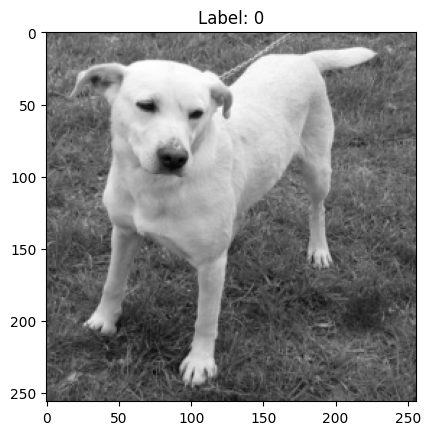

In [19]:
# Retrieve one image and its corresponding label from the test dataset
# Here, we are accessing the third sample in the test dataset (index 2)
image, label = ds_test[2]

# Display the retrieved image along with its label
# The function `display_image_with_label` will show the image and annotate it with the label
# This helps in visually verifying the correctness of the dataset and the labels
display_image_with_label(image, label)

In [20]:
# Now let's get the model prediction for this image

# Disable gradient calculation to save memory and computations during inference
with torch.no_grad():
    # Get the model's prediction logits for the image
    # We unsqueeze the image tensor to add a batch dimension and move it to the device (e.g., GPU)
    prediction_logits = model(image.unsqueeze(0).to(device))

    # Apply the softmax function to convert logits to confidences
    # This gives us the confidence scores for each class
    # Note: Do not interpret these as the probability of belonging to a class
    prediction_probs = F.softmax(prediction_logits, dim=1)

    # Get the label with the highest confidence score
    # `argmax(dim=1)` returns the index of the maximum value along the specified dimension
    # `.item()` converts the tensor to a Python scalar
    prediction_label = prediction_probs.argmax(dim=1).item()

# Print the model's predicted label and its confidence score
# `prediction_probs.max().item()` gives the highest confidence score
print(f"Model prediction: {prediction_label} (p={prediction_probs.max().item():.4f})")

# Print the true label of the image for comparison
print(f"True label: {label}")

Model prediction: 0 (p=0.5810)
True label: 0


> ### Softmax Scores vs. Probabilities
>
> While softmax scores are valuable for determining the most likely class and comparing the relative likelihood of different classes, they should not be mistaken for the true probability of the input belonging to a specific class. Their primary utility lies in ranking and decision-making rather than providing precise probabilistic measures of correctness.
>
> #### Understanding Softmax Scores
>
> - **Softmax Function**:
>   - The softmax function transforms raw model logits (which can be any real number) into values that sum to 1 and fall within the range (0, 1).
>   - This transformation makes the logits appear like probabilities, as each value represents a portion of the whole, summing up to 1.
>
> #### Limitations of Softmax Scores
>
> - **Not True Probabilities**:
>   - Despite their appearance, softmax scores are not true probabilities in a Bayesian sense.
>   - They signify relative confidence levels among the classes based on the input image and the model’s training experience.
>
> #### Model Calibration
>
> - **Calibration Issues**:
>   - Many machine learning models, including neural networks, often suffer from poor calibration.
>   - Poor calibration means that the confidence scores output by the model do not accurately reflect the true likelihood of correctness.
>
> - **Example**:
>   - A model might output a score of 0.9 for a particular class, indicating high confidence. However, the actual probability that this prediction is correct could be significantly lower.
>
> #### Overconfidence in Models
>
> - **Overconfident Predictions**:
>   - Models can sometimes be overconfident, assigning high softmax scores to incorrect classes.
>   - This overconfidence can lead to misinterpretation, where these scores are mistakenly considered as true probabilities of correctness.
>
> #### Practical Use of Softmax Scores
>
> - **Ranking Predictions**:
>   - Despite their limitations, softmax scores are extremely useful for ranking predictions.
>   - They help in making decisions based on the relative likelihood of different classes.
>
> - **Classification Tasks**:
>   - In classification tasks, softmax scores are used to select the most likely class among the available options.
>

In [21]:
# Saving the model's state dictionary (parameters)

# `torch.save` is used to save the model's state dictionary to a file
# The state dictionary contains all the learnable parameters of the model (i.e., weights and biases)
# This allows us to save the trained model and load it later for inference or further training

# Save the state dictionary to the specified path
torch.save(model.state_dict(), "outputs/model_weights.pth")

# Print a confirmation message to indicate that the model has been saved successfully
print("Model saved to outputs/model_weights.pth")

Model saved to outputs/model_weights.pth


In [22]:
# Recreating the model from the saved weights

# Initialize a new instance of the ImageClassifier model
# This creates a new model with the same architecture as the original model
model2 = ImageClassifier().to(device)

# Load the state dictionary (parameters) from the saved file into the new model
# `torch.load` loads the state dictionary from the specified file
# `load_state_dict` updates the model's parameters with the loaded state dictionary
model2.load_state_dict(torch.load("outputs/model_weights.pth"))

# Now, model2 has the same weights as the original model at the time it was saved
# This allows us to use model2 for inference or further training with the same learned parameters

/tmp/ipykernel_3093856/3049656588.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load("outputs/model_weights.pth"))


<All keys matched successfully>

In [23]:
# Getting the same prediction, but with the new model

# Disable gradient calculation to save memory and computations during inference
with torch.no_grad():
    # Get the model's prediction logits for the image using the new model (model2)
    # We unsqueeze the image tensor to add a batch dimension and move it to the device (e.g., GPU)
    prediction_logits = model2(image.unsqueeze(0).to(device))

    # Apply the softmax function to convert logits to probabilities
    # This gives us the probability scores for each class
    prediction_probs = F.softmax(prediction_logits, dim=1)

    # Get the label with the highest probability score
    # `argmax(dim=1)` returns the index of the maximum value along the specified dimension
    # `.item()` converts the tensor to a Python scalar
    prediction_label = prediction_probs.argmax(dim=1).item()

# Print the model's predicted label and its probability score
# `prediction_probs.max().item()` gives the highest probability score
print(f"Model prediction: {prediction_label} (p={prediction_probs.max().item():.4f})")

# Print the true label of the image for comparison
print(f"True label: {label}")

Model prediction: 0 (p=0.5810)
True label: 0


In [24]:
# The fact that we got the same prediction means that the model was saved and loaded correctly.
# Now, let's see what happens if we try with a randomly initialized model

# Initialize a new instance of the ImageClassifier model
# This creates a new model with the same architecture but with randomly initialized weights
model3 = ImageClassifier().to(device)

# We are not loading the saved weights into this model, so it remains randomly initialized

# Disable gradient calculation to save memory and computations during inference
with torch.no_grad():
    # Get the model's prediction logits for the image using the randomly initialized model (model3)
    # We unsqueeze the image tensor to add a batch dimension and move it to the device (e.g., GPU)
    prediction_logits = model3(image.unsqueeze(0).to(device))

    # Apply the softmax function to convert logits to probabilities
    # This gives us the probability scores for each class
    prediction_probs = F.softmax(prediction_logits, dim=1)

    # Get the label with the highest probability score
    # `argmax(dim=1)` returns the index of the maximum value along the specified dimension
    # `.item()` converts the tensor to a Python scalar
    prediction_label = prediction_probs.argmax(dim=1).item()

# Print the model's predicted label and its probability score
# `prediction_probs.max().item()` gives the highest probability score
print(f"Model prediction: {prediction_label} (p={prediction_probs.max().item():.4f})")

# Print the true label of the image for comparison
print(f"True label: {label}")

# Since model3 is randomly initialized, its predictions are expected to be less accurate or even completely incorrect
# This demonstrates the importance of training the model and saving/loading the learned weights

Model prediction: 1 (p=0.5115)
True label: 0


> PyTorch is a popular deep learning framework that offers a lot of flexibility and control over the training process. However, this power comes with a cost: it requires a significant amount of boilerplate code. This can be overwhelming for beginners who are just getting started with building and training neural networks.
>
> **Why PyTorch Requires Boilerplate Code ?**
>
> 1. **Manual Loss Tracking**: In PyTorch, you have to manually keep track of the loss during training.>
> 2. **Training Loop Management**: You need to write custom loops for training, validation, and testing.>
> 3. **Optimizer Step Calls**: The optimizer steps also have to be explicitly defined.>
> 4. **Device Management**: Managing devices (CPU/GPU) and ensuring the model and data are on the right device adds another layer of complexity.
>
> While these tasks give you granular control over your model's behavior, they can make the initial setup quite cumbersome.
>
> This is where **PyTorch Lightning** comes in.

## [PyTorch Lightning](https://lightning.ai/docs/pytorch/stable/starter/introduction.html)

While PyTorch offers fine-grained control, it can be complex for new users due to the required boilerplate code. PyTorch Lightning mitigates this by providing a structured approach that simplifies the training process, thus enabling faster experimentation and development.

**PyTorch Lightning** is a lightweight wrapper for PyTorch that helps reduce the amount of boilerplate code without sacrificing flexibility. It abstracts away many of the repetitive tasks involved in training neural networks. Here are some of its benefits:

1. **Simplified Training Loops**: PyTorch Lightning provides built-in support for training, validation, and test loops.
2. **Automatic Device Management**: It automatically takes care of moving your model and data to the appropriate device (CPU or GPU).
3. **Extensible Framework**: You can easily extend PyTorch Lightning to customize any part of the training process if needed.
4. **Easier Experimentation**: With less boilerplate code, you can focus more on experimenting and refining your models rather than managing the training infrastructure.
5. **Reproducibility**: PyTorch Lightning ensures that your experiments are reproducible by setting random seeds and providing other utilities for reproducibility.
6. **Community Support**: PyTorch Lightning has a large community of users and contributors, making it easier to find help and resources.
7. **Combination with Other Libraries**: It integrates seamlessly with other popular libraries like Weights & Biases for experiment tracking and logging or Hugging Face Transformers for natural language processing tasks.

With PyTorch Lightning, you can skip many of the manual steps involved in training a neural network, making your code cleaner and easier to maintain. Once you get accustomed to it, you'll find that it significantly speeds up the development process while still allowing for complex customization when required.

Using PyTorch Lightning doesn't mean you're limited; rather, it streamlines the process so you can focus on what's important—building and improving your models.

We'll reimplement the Fully Connected classifier using PyTorch Lightning to demonstrate how it simplifies the training process.

In [25]:
import lightning as L
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Optimizer


# Define the model
class ImageClassifier(L.LightningModule):
    def __init__(self):
        """
        Initialize the ImageClassifier model.
        """
        super().__init__()
        self.flatten_layer = nn.Flatten()

        # Define a sequence of fully connected layers
        self.fully_connected_layers = nn.Sequential(
            nn.Linear(
                256 * 256, 1024
            ),  # First fully connected layer: Input size 256x256, output size 1024
            nn.ReLU(),  # Activation function: Introduces non-linearity
            nn.Linear(1024, 1024),  # Second fully connected layer
            nn.ReLU(),
            nn.Linear(1024, 1024),  # Third fully connected layer
            nn.ReLU(),
            nn.Linear(1024, 1024),  # Fourth fully connected layer
            nn.ReLU(),
            nn.Linear(1024, 2),  # Output layer: 2 classes for binary classification
        )

    def forward(self, input_tensor: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the model.
        """
        flattened_input = self.flatten_layer(input_tensor)  # Flatten the input
        logits = self.fully_connected_layers(
            flattened_input
        )  # Pass through fully connected layers
        return logits

    def training_step(
        self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int
    ) -> torch.Tensor:
        """
        Training step for the model.
        """
        inputs, labels = batch
        logits = self(inputs)  # Forward pass
        loss = F.cross_entropy(logits, labels)  # Calculate loss
        self.log("train_loss", loss, prog_bar=True)  # Log the training loss
        return loss

    def validation_step(
        self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int
    ) -> None:
        """
        Validation step for the model.
        """
        inputs, labels = batch
        logits = self(inputs)  # Forward pass
        loss = F.cross_entropy(logits, labels)  # Calculate loss
        self.log(
            "val_loss", loss, prog_bar=True, sync_dist=True
        )  # Log the validation loss

        # Calculate and log validation accuracy
        probs = F.softmax(logits, dim=1)  # Convert logits to probabilities
        preds = torch.argmax(probs, dim=1)  # Get predicted class
        accuracy = torch.sum(preds == labels).item() / len(labels)
        self.log("val_acc", accuracy, prog_bar=True, sync_dist=True)

    def test_step(
        self, batch: Tuple[torch.Tensor, torch.Tensor], batch_idx: int
    ) -> None:
        """
        Test step for the model.
        """
        inputs, labels = batch
        logits = self(inputs)  # Forward pass
        loss = F.cross_entropy(logits, labels)  # Calculate loss
        self.log("test_loss", loss, prog_bar=True)  # Log the test loss

        # Calculate and log test accuracy
        probs = F.softmax(logits, dim=1)  # Convert logits to probabilities
        preds = torch.argmax(probs, dim=1)  # Get predicted class
        accuracy = torch.sum(preds == labels).item() / len(labels)
        self.log("test_acc", accuracy, prog_bar=True)

    def configure_optimizers(self) -> Optimizer:
        """
        Configure the optimizer for the model.
        """
        return torch.optim.Adam(
            self.parameters(), lr=3e-4
        )  # Use Adam optimizer with learning rate 3e-4

### Introduction to DataModules
The `LightningDataModule` in PyTorch Lightning is designed to decouple data-related hooks from the `LightningModule`, allowing you to develop dataset-agnostic models. This separation of concerns makes it easier to interchange different datasets with your model, easing testing and benchmarking across various domains. Additionally, it promotes sharing and reusing consistent data splits and transformations across projects.

#### Key Benefits of DataModules

1. Dataset Splits: With a `LightningDataModule`, you can clearly define and manage the dataset splits. This ensures that everyone in your team knows exactly how your data has been split into training, validation, and test sets.

2. Sample Management: It provides an easy way to keep track of the number of samples within each split and overall. This helps in maintaining a clear understanding of your dataset's structure.

3. Consistent Transforms: By using a `LightningDataModule`, you can specify and reuse the exact transformations applied to your data. This is crucial for ensuring consistency across different experiments and projects.

#### Why Use DataModules?

**Ease of Collaboration**
When working in a team, using `DataModules` can save a lot of time and effort. Your colleagues can simply drop a `DataModule` into the `Trainer` without worrying about the data preprocessing steps. This streamlined process enhances productivity and reduces errors related to data handling.

**Seamless Experimentation**
In both academic and corporate settings, iterating through ideas quickly is essential. Ad-hoc data cleaning and custom instructions can slow down progress. Using `DataModules` removes these bottlenecks by providing a standardized way of handling data, making it easier to focus on developing and improving models.


`LightningDataModule` encapsulates key data-related components:

- **Dataset Splits**: Clear definitions of training, validation, and test splits.
- **Sample Counts**: Easy tracking of sample numbers in each split and overall.
- **Transforms**: Consistent application of data transformations.

With `DataModules`, you not only make your code cleaner and more maintainable but also aid better collaboration and faster iteration in experiments. This approach is highly beneficial for both academic research and industry applications, where efficient data management is crucial for success. Incorporating `DataModules` into your PyTorch Lightning workflow will help standardize data handling processes, making your projects more robust and easier to share with others.

In [26]:
import lightning as L
from torch.utils.data import DataLoader
from typing import Optional


class DogsCatsDataModule(L.LightningDataModule):
    def __init__(self, batch_size: int = 128, num_workers: int = 1):
        """
        Initialize the DogsCatsDataModule.

        Args:
            batch_size (int): Number of samples per batch.
            num_workers (int): Number of subprocesses to use for data loading.
        """
        super().__init__()
        self.batch_size = batch_size
        self.num_workers = num_workers

    def setup(self, stage: Optional[str] = None) -> None:
        """
        Set up the datasets for training, validation, and testing.
        This method is called on every GPU in distributed training.

        Args:
            stage (Optional[str]): Stage to set up (e.g., 'fit', 'validate', 'test', 'predict').
        """
        # Create dataset instances for train, validation, and test sets
        # Note: DogsCatsDataset and image_transforms should be defined elsewhere
        self.train_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/train", transform=image_transforms
        )
        self.validation_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/valid", transform=image_transforms
        )
        self.test_dataset = DogsCatsDataset(
            root_dir="data/dogs-vs-cats/test", transform=image_transforms
        )

    def train_dataloader(self) -> DataLoader:
        """
        Create DataLoader for the training dataset.
        This method is called every epoch.

        Returns:
            DataLoader: DataLoader for the training dataset.
        """
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            shuffle=True,  # Shuffle training data for better generalization
            num_workers=self.num_workers,
        )

    def val_dataloader(self) -> DataLoader:
        """
        Create DataLoader for the validation dataset.
        This method is called every epoch.

        Returns:
            DataLoader: DataLoader for the validation dataset.
        """
        return DataLoader(
            self.validation_dataset,
            batch_size=self.batch_size,
            shuffle=False,  # No need to shuffle validation data
            num_workers=self.num_workers,
        )

    def test_dataloader(self) -> DataLoader:
        """
        Create DataLoader for the test dataset.
        This method is typically called once at the end of training.

        Returns:
            DataLoader: DataLoader for the test dataset.
        """
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            shuffle=False,  # No need to shuffle test data
            num_workers=self.num_workers,
        )

In [27]:
# Initialize the data module for the Dogs vs. Cats dataset
# This module handles data loading, preprocessing, and batching
dm = DogsCatsDataModule()

# Initialize the image classification model
# This model will be trained to distinguish between images of dogs and cats
model = ImageClassifier()

# Initialize the trainer from the Lightning library
# The trainer manages the training loop, including logging, checkpointing, and more
# max_epochs=3 specifies that the training will run for 3 epochs
# accelerator='auto' allows the trainer to automatically select the best available hardware (CPU or GPU)
# devices=1 specifies that training will use one device (either one CPU or one GPU)
trainer = L.Trainer(max_epochs=3, accelerator="auto", devices=1)

# Start the training process
# The trainer will use the model and data module to train the model
trainer.fit(model, dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-12-09 17:20:40.358832: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733775640.377422 3093856 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733775640.383044 3093856 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin c

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.
/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=47` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


### Interpreting the Training Results

As the model trains, you'll see the training loss and validation metrics printed for each epoch.

- The training loss should generally decrease over time, indicating that the model is learning from the data.
- The validation metrics (e.g., accuracy) give an estimate of how well the model generalizes to unseen data.

Keep an eye on these metrics to gauge the model's performance and detect potential issues like overfitting (low training loss but high validation loss) or underfitting (high training and validation loss).

In [28]:
# What if we want to use other advanced features like mixed precision?

# Initialize the data module for the Dogs vs. Cats dataset
# num_workers=24 increases the number of workers to speed up data loading.
# Note: Loading data from a Network Drive can create a network bottleneck, so this change might not always be effective.
dm = DogsCatsDataModule(num_workers=24)

# Initialize the image classification model
model = ImageClassifier()

# Initialize the trainer from the Lightning library
# max_epochs=3 specifies that the training will run for 3 epochs
# accelerator='auto' allows the trainer to automatically select the best available hardware (CPU or GPU)
# devices=1 specifies that training will use one device (either one CPU or one GPU)
# precision=16 enables mixed precision training, which uses 16-bit floating point numbers instead of 32-bit
trainer = L.Trainer(max_epochs=3, accelerator="auto", devices=1, precision=16)

# Start the training process
# The trainer will use the model and data module to train the model
trainer.fit(model, dm)

# It took less time to train the model using mixed precision (2m 47s vs 14m 26s).
# This is because the model uses less memory and computations with 16-bit floating point numbers.
# However, mixed precision can lead to numerical instability, so it's important to monitor the training process.
# Newer techniques like bfloat16 can provide the benefits of mixed precision while reducing the risk of instability.

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/lightning/fabric/connector.py:571: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name                   | Type       | Params | Mode 
--------------------------------------------------------------
0 | flatten_layer          | Flatten    | 0      | train
1 | fully_connected_layers | Sequential | 70.3 M | train
--------------------------------------------------------------
70.3 M    Trainable params
0         Non-trainable params
70.3 M    Total params
281.043   Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=3` reached.


In [29]:
# Save the model checkpoint
# This saves the current state of the model, including weights and optimizer state, to a file.
# The checkpoint can be used to resume training later or for inference.
# "outputs/lightning_model.ckpt" is the path where the checkpoint will be saved.
trainer.save_checkpoint("outputs/lightning_model.ckpt")

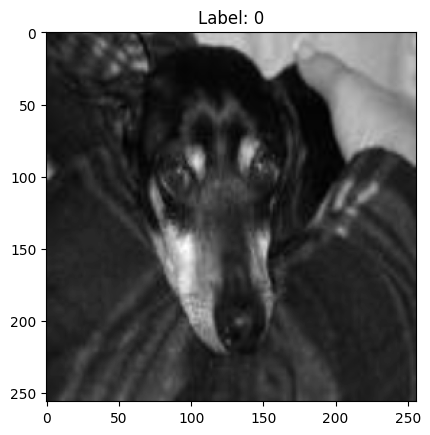

In [30]:
from matplotlib import pyplot as plt

# Get one batch of images and labels from the test set using the data module's test dataloader
# dm.test_dataloader() returns an iterator over the test dataset
image, label = next(iter(dm.test_dataloader()))

# Select the first image and its corresponding label from the batch
image = image[0]
label = label[0]

# Display the image using matplotlib
# permute(1, 2, 0) changes the order of dimensions from (C, H, W) to (H, W, C) for correct display
plt.imshow(image.permute(1, 2, 0), cmap="gray")

# Set the title of the plot to show the label of the image
plt.title(f"Label: {label}")

# Show the plot
plt.show()

In [31]:
# Load the model from a checkpoint
# This restores the model's state, including weights and optimizer state, from a previously saved checkpoint file.
# "outputs/lightning_model.ckpt" is the path to the checkpoint file.
# This allows us to resume training or perform inference with the model without retraining from scratch.
new_model = ImageClassifier.load_from_checkpoint("outputs/lightning_model.ckpt")

In [32]:
# Set the model to evaluation mode
# This changes the behavior of certain layers (e.g., dropout, batch normalization) to behave appropriately during inference.
new_model.eval()

# Freeze the model parameters
# This prevents the model's parameters from being updated during inference or further training.
# It's useful when you want to ensure the model's weights remain unchanged.
new_model.freeze()

In [33]:
# Initialize a new trainer for inference
# accelerator='cpu' specifies that we are using the CPU for inference
# This is often done when GPU resources are limited or not needed for inference
new_trainer = L.Trainer(accelerator="cpu")

# Run the test method to evaluate the model on the test dataset
# new_model is the model loaded from the checkpoint and set to evaluation mode
# datamodule=dm specifies the data module that provides the test dataset
# This will output the test results, such as accuracy and loss, to evaluate the model's performance
new_trainer.test(new_model, datamodule=dm)

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/jacob/.cache/pypoetry/virtualenvs/deep-learning-gen-ai-vEhrekpc-py3.12/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.6059390306472778     │
│         test_loss         │    0.6580490469932556     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6580490469932556, 'test_acc': 0.6059390306472778}]

In [34]:
# Pass the image through the model to get the raw prediction logits
# image.unsqueeze(0) adds a batch dimension to the image tensor, making its shape (1, C, H, W)
# This is necessary because the model expects a batch of images as input
pred_logits = model(image.unsqueeze(0))

# Apply the softmax function to the logits to convert them into probabilities
# dim=1 specifies that the softmax should be applied across the class dimension
pred_probs = F.softmax(pred_logits, dim=1)

# Get the predicted label by finding the index of the maximum probability
# argmax(dim=1) returns the index of the maximum value along the specified dimension
# .item() converts the single-element tensor to a Python scalar
pred_label = pred_probs.argmax(dim=1).item()

# Print the model's prediction and the corresponding probability
# pred_label is the predicted class label
# pred_probs.max().item() is the highest probability value, formatted to 4 decimal places
print(f"Model prediction: {pred_label} (p={pred_probs.max().item():.4f})")

Model prediction: 1 (p=0.5360)


In [35]:
# Now the same, but for the model that was loaded from a checkpoint

pred_logits = new_model(image.unsqueeze(0))
pred_probs = F.softmax(pred_logits, dim=1)
pred_label = pred_probs.argmax(dim=1).item()
print(f"Model prediction: {pred_label} (p={pred_probs.max().item():.4f})")

Model prediction: 1 (p=0.5360)


# Questions

1. What are the two primary high-level features provided by PyTorch?

2. In PyTorch, what is the purpose of the `autograd` package?

3. What are the main steps in the typical training procedure for a neural network in PyTorch?

4. How does PyTorch Lightning simplify the process of building and training neural networks compared to vanilla PyTorch?

5. What are the key benefits of using DataLoaders in PyTorch?

6. Why are data transformations important in the machine learning pipeline?

7. What is the difference between a batch and an epoch in the context of neural network training?

8. How does mixed precision training affect the training process, and what potential drawback should be monitored?

9. What is the purpose of the `LightningDataModule` in PyTorch Lightning?

10. Why should softmax scores output by a model not be interpreted as true probabilities?

`Answers are commented inside this cell`

<!--
1. The two primary high-level features provided by PyTorch are:
- Tensor computation (similar to NumPy but with strong GPU acceleration)
- Dynamic neural networks (built on a tape-based automatic differentiation system)

2. The `autograd` package in PyTorch provides automatic differentiation for all operations on Tensors. It's a define-by-run framework, meaning that backpropagation is defined by how your code runs, allowing for dynamic graph creation on-the-fly.

3. The main steps in the typical training procedure for a neural network in PyTorch are:
- Define the neural network
- Repeat over a dataset
- Process input through the network (forward pass)
- Compute the loss
- Propagate gradients back through the network (backpropagation)
- Update the weights

4. PyTorch Lightning simplifies the process by:
- Providing built-in support for training, validation, and test loops
- Automatically handling device management (CPU/GPU)
- Reducing boilerplate code
- Offering easier experimentation and reproducibility

5. Key benefits of using DataLoaders in PyTorch include:
- Batching data
- Shuffling data
- Enabling parallel data loading
- Improving memory efficiency and training speed

6. Data transformations are important because they help in:
- Normalizing data
- Enhancing data to increase dataset diversity
- Preprocessing data to make it suitable for model input

7. A batch is a subset of the entire dataset processed in one iteration, while an epoch is one complete pass through the entire dataset, consisting of multiple batches.

8. Mixed precision training can improve training speed and reduce memory usage. However, it can potentially lead to numerical instability, which should be monitored during the training process.

9. The `LightningDataModule` in PyTorch Lightning encapsulates all the steps involved in data processing, including:
- Downloading
- Tokenizing
- Transforming
- Splitting datasets
It helps in creating reusable and shareable datasets.

10. Softmax scores should not be interpreted as true probabilities because:
- They only represent relative confidence levels among classes
- Models can be poorly calibrated, leading to overconfident predictions
- They don't reflect the true likelihood of correctness in a Bayesian sense -->